# Initial settings

Install kaggle API in colab

In [1]:
!pip install kaggle

Upload the kaggle API key in here

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Downloading the dataset

In [3]:
!kaggle datasets download "grassknoted/asl-alphabet"

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
100% 1.02G/1.03G [00:07<00:00, 79.0MB/s]
100% 1.03G/1.03G [00:07<00:00, 153MB/s] 


Unzipping the dataset

In [4]:
!unzip asl-alphabet.zip

Output streaming troncato alle ultime 5000 righe.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tra

# Dataset Loading and preparation

In [5]:
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

BATCH_SIZE = 64

In [8]:
train_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [21]:
train_dataset = torchvision.datasets.ImageFolder(root='asl_alphabet_train/asl_alphabet_train', transform=train_transform)
print(train_dataset)
test_dataset = torchvision.datasets.ImageFolder(root='asl_alphabet_test', transform=test_transform)
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 87000
    Root location: asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               Resize(size=(200, 200), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
               RandomRotation(degrees=[30.0, 70.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
Dataset ImageFolder
    Number of datapoints: 28
    Root location: asl_alphabet_test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [12]:
#num worker could be 4, test it with gpu
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=2, pin_memory=True
)

test_loader = DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=2, pin_memory=True
)

# Visualizing the data

In [39]:
import torch
import os
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

root = 'asl_alphabet_train/asl_alphabet_train'
transform = transforms.Compose([
    transforms.ToTensor()
])
images = []
labels = []
folders = os.listdir(root)
for folder in folders:
    labels.append(folder)
    imagepath = root + '/' + folder + '/' + folder + '1.jpg'
    _image = Image.open(imagepath)
    image_tensor = transform(_image)
    images.append(image_tensor)

In [50]:
rows = len(labels) / 3
rows = round(rows)

In [51]:
images1 = images[:rows]
images2 = images[rows:2*rows]
images3 = images[2*rows:]

labels1 = labels[:rows]
labels2 = labels[rows:2*rows]
labels3 = labels[2*rows:]

['U', 'E', 'G', 'Y', 'del', 'H', 'L', 'T', 'J', 'B']


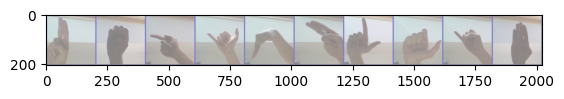

['K', 'S', 'nothing', 'I', 'R', 'X', 'C', 'W', 'N', 'Q']


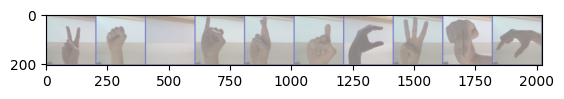

['F', 'O', 'P', 'Z', 'space', 'A', 'V', 'D', 'M']


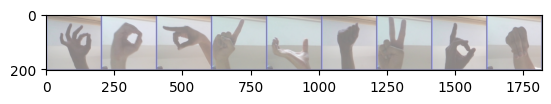

In [54]:
def imshow(img):
    img = img / 2 + 0.5  # de-normalizzare se necessario
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

img_grid = make_grid(images1, nrow=rows)
print(labels1)
imshow(img_grid)
img_grid = make_grid(images2, nrow=rows)
print(labels2)
imshow(img_grid)
img_grid = make_grid(images3, nrow=rows)
print(labels3)
imshow(img_grid)